In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import scipy.optimize as opt

In [3]:
#load Data
data = loadmat('ex4data1.mat')
X = data['X']
y = data['y'].ravel()

weight = loadmat("ex4weights.mat")
Theta1 = weight["Theta1"]
Theta2 =  weight["Theta2"]

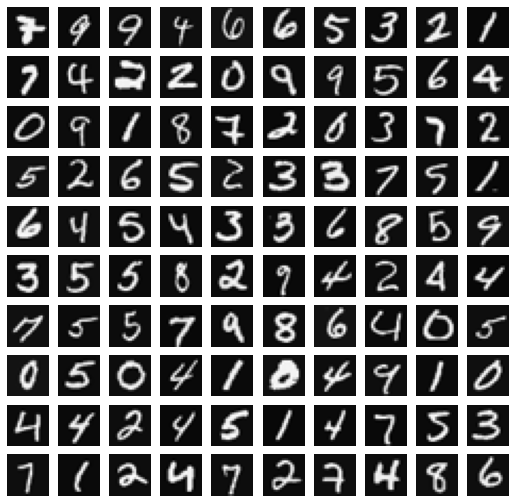

In [4]:
plt.figure(figsize=(9,9))
for i in range(100):
    plt.subplot(10,10,i+1) # 10 rows 10 columns index i+1
    plt.imshow(X[np.random.randint(0,5001)].reshape((20,20)).T, cmap =cm.gray)
    plt.axis('off')
plt.show()

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

sigmoid(0)

0.5

In [6]:
def sigmoidGradient(z):
    return sigmoid(z) * (1- sigmoid(z))
sigmoidGradient(0)

0.25

In [15]:
#Cost Function
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam):
    
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape((num_labels, hidden_layer_size + 1))
    
    m = X.shape[0]    
    
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    a1 = np.c_[np.ones(m),X]
    z2 = Theta1.dot(a1.T)
    a2 = sigmoid(z2)
    a2 = np.insert(a2,0,1, axis=0)
    z3 = Theta2.dot(a2)
    a3 = sigmoid(z3)
    h = a3
    
    yVec = np.zeros((m,num_labels))
    
    yVec[np.arange(X.shape[0]), y - 1] = 1
    
    J = -(yVec.T*np.log(h)) - ((1 - yVec.T)*np.log(1 - h))
    J = np.sum(J) / m
    
    reg = np.sum((Theta1[:, 1:]**2)) + np.sum((Theta2[:, 1:]**2))
    
    J += (reg * lam) / (2 * m)
    
    return J

input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.hstack((Theta1.ravel(), Theta2.ravel()))
lam = 0
j = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam)



print(j)  # 0.287629

0.28762916516131887


In [17]:
#implement regularization
lam = 1
j= nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam)
print(j)

0.3837698590909236


In [18]:
#sigmoid gradient
g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))
g

array([0.19661193, 0.23500371, 0.25      , 0.23500371, 0.19661193])

In [19]:
#initializing neural network parameters
def randInitializeWeights(L_in,L_out):
    e = 0.12
    W = np.random.rand(L_out, L_in+1) *2*e-e
    return W

initial_theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_theta2 = randInitializeWeights(hidden_layer_size, num_labels)

initial_nn_params = np.append(initial_theta1, initial_theta2)

In [20]:
def gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam):
    
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape((num_labels, hidden_layer_size + 1))
    
    m = X.shape[0] 
    
    a1 = np.c_[np.ones(m),X]
    z2 = Theta1.dot(a1.T)
    a2 = sigmoid(z2)
    a2 = np.insert(a2,0,1, axis=0)
    z3 = Theta2.dot(a2)
    a3 = sigmoid(z3)
    h = a3
    
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    for j in range (1,m):
        
        a1 = np.append(1,X[j,:])
        z2 = Theta1.dot(a1)
        a2 = np.append(1,sigmoid(z2))
        z3 = Theta2.dot(a2)
        a3 = sigmoid(z3)
                
        yy = np.zeros((m, num_labels))
        yy[np.arange(m), y - 1] = 1
        
        delta3 = a3 - yy[j,:]
        
        delta2 = Theta2.T.dot(delta3.T) * np.append(1,sigmoidGradient(z2))
        delta2 = delta2[1:]
        
        Theta1_grad = Theta1_grad + np.array([delta2]).T.dot(np.array([a1]))
        Theta2_grad = Theta2_grad + np.array([delta3]).T.dot(np.array([a2]))
        
    theta1_grad = (lam/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:])) + (1/m)*Theta1_grad
    theta2_grad = (lam/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:])) + (1/m)*Theta2_grad
        
    grad = np.append(theta1_grad.flatten(), theta2_grad.flatten())
    
    return grad

In [28]:
lam = 3
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam)

0.5760512469501331

In [30]:
params = opt.minimize(fun=nnCostFunction, x0=nn_params, args=(input_layer_size, hidden_layer_size, num_labels, X, y, lam), method = 'CG', jac = gradient, options={"maxiter": 150})
params

     fun: 0.5674886390166682
     jac: array([-1.35927011e-04, -1.56830939e-14,  3.25787300e-15, ...,
       -6.67600362e-05, -3.85149844e-05, -2.08985355e-05])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 321
     nit: 150
    njev: 321
  status: 1
 success: False
       x: array([ 7.05693996e-02, -2.61384898e-11,  5.42978833e-12, ...,
        3.35499918e-02,  1.37877588e+00, -1.29384584e+00])

In [31]:
Theta1 = params.x[:hidden_layer_size * (input_layer_size + 1)].reshape((hidden_layer_size, input_layer_size + 1))
Theta2 = params.x[hidden_layer_size * (input_layer_size + 1):].reshape((num_labels, hidden_layer_size + 1))
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


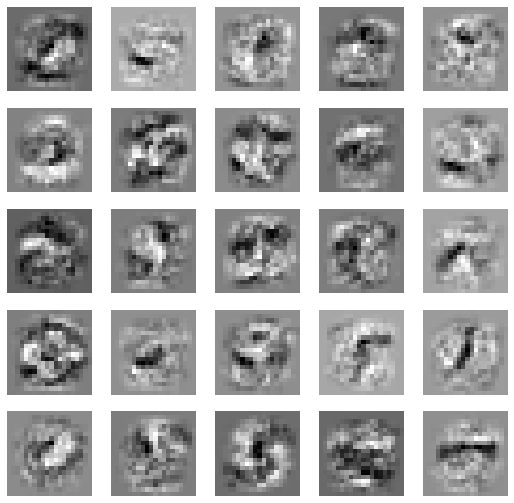

In [32]:
plt.figure(figsize=(9,9))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(Theta1[i, 1:].reshape((20,20)).T, cmap=cm.gray)
    plt.axis('off')
plt.show()

In [33]:
def predict(Theta1,Theta2,X):
    #Hidden layer
    a1 = np.insert(X,0,1, axis=1)
    a2 = sigmoid(a1.dot(Theta1.T))
    
    #output layer
    a2 = np.insert(a2,0,1, axis=1)
    a3 = sigmoid(a2.dot(Theta2.T))
    
    predictions = np.argmax(a3, axis=1) +1
    return predictions

In [34]:
accuracy = np.mean(predict(Theta1,Theta2,X)==y)
print(f'Accuracy = {np.round(accuracy*100,2)}%')

Accuracy = 97.7%
